# Linear combinations, span, and basis vectors | Chapter 2, Essence of linear algebra

Notes from the Lecture by 3Blue1Brown
https://www.youtube.com/watch?v=k7RM-ot2NWY&ab_channel=3Blue1Brown

In [104]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

In [247]:
# This plotting function started based off of the plot_vectors by Mr. Hadrien Jean but I added more functions.
# When you pass in a single vector, the plot will show you supporting dashed lines to clarify the vector position.
# If multiple, it shows how the vector "moves" by scaling and vector multiplication.
# So it is helpful if you pass in vectors that are scaled and multiplied to see how they move around across the 2D vector space. 

def plot_vectors(vectors, plot_size=None, values_in="label"):

    colors = ["lightcoral", "indianred", "brown", "firebrick", "olive", "darkslategrey", 
              "teal", "darkcyan", "lightblue", "blue", "purple", "mediumvioletred", 
              "green", "darkgreen", "forestgreen", "slategrey", "cornflowerblue", 
              "royalblue", "midnightblue", "navy", "darkorchid", "tomato", "coral", 
              "maroon", "darkred", "darkgoldenrod", "darkorange"]

    if (plot_size):
        plt.figure(figsize=plot_size)
    else:
        plt.figure()
    plt.axvline(x=0, c='lightgray', label='Origin')
    plt.axhline(y=0, c='lightgray')

    for vector in vectors:
        # if there is only one vector, draw supporting lines to visualise vector position.
        if (len(vectors) == 1):
            plt.axvline(x=vector[0], c='gainsboro', linestyle=(0, (5, 10)))
            plt.axhline(y=vector[1], c='gainsboro', linestyle=(0, (5, 10)))
        # else, draw the business as usual. :D
        x = np.concatenate([[0,0], vector])
        rounded_vector = [np.round(value, 3) for value in vector]
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]], angles='xy', scale_units='xy',
                scale=1, label=f'{rounded_vector}', color=colors[random.randint(0, len(colors))])
            
        if (values_in == "label"):        
            plt.annotate(str(rounded_vector), xy=(vector[0] + 0.25, vector[1] + 0.25), ha='center', va='top', c='black', fontsize=13)
        elif (values_in == "legend"):
            plt.legend()

    # draw dotted line to mark the movement of vector scaling.    
    for i in range(1, len(vectors)):
        x_values = [vectors[i-1][0], vectors[i][0]]
        y_values = [vectors[i-1][1], vectors[i][1]]
        print(x_values, y_values)
        plt.plot(x_values, y_values, c='gainsboro', linestyle='dotted')


(-1.0, 5.0)

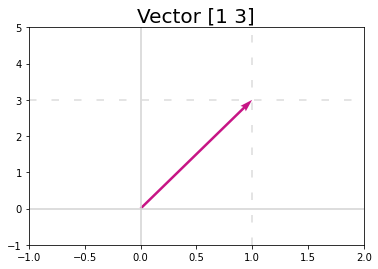

In [162]:
v1 = np.array([1, 3])
plot_vectors([v1])
plt.xlim(-1, 2)
plt.ylim(-1, 5)

## $Basis$
The $basis$ of a vector space is a set of $linearly$ $independent$ $vectors$ that $span$ the full space.

## $Basis$ $vectors$ $\hat i$ $\hat j$
- "basis vectors" of the $xy$ $coordinate$ $system$.
- When you think about coordinates as a scaler, the basis vectors are what the scalers actually scale. 

* **concept of adding 2 scale vectors**:   
    - 3$\hat j$ + (-2)$\hat j$
    - which 2D vectors can you reach by altering the choices of scalers?: every possible 2D vectors. 






(-1.0, 3.5)

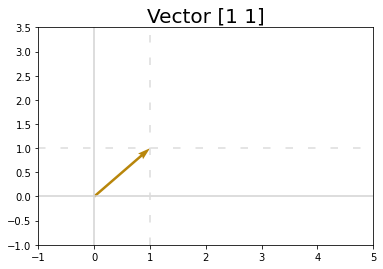

In [164]:
basis = np.array([1, 1])

plot_vectors([basis])
plt.xlim(-1, 5)
plt.ylim(-1, 3.5)

## $Linear$ $Combination$ $of$ $vectors$ $\overrightarrow v$ $\overrightarrow w$
- $a$$\overrightarrow v$ + $b$$\overrightarrow w$
    - scalars: $a$ & $b$

- Example) &emsp; 1.50$\overrightarrow v$ + 0.06$\overrightarrow w$
- If you scale only one of the two vector values, then the resulting vector will draw a straight line. 

- However, if your two original vectors happen to line up, the new resuling vectors they draw will be limited to a single line.
- Or, both your vectors can shrink down to a point (the origin).

### Exercise 1.50$\overrightarrow v$ + 0.06$\overrightarrow w$

[1, 4] [3, 7]
[4, 1.74] [7, 4.92]


(-1.0, 8.0)

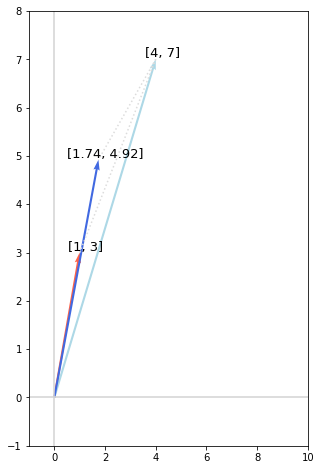

In [228]:
v = np.array([1, 3])
w = np.array([4, 7])

vector_scaling1 = [v, w, vw_scaled]

vw_scaled = 1.50*v + 0.06*w
plot_vectors(vector_scaling1, plot_size=(5, 8), values_in="label")
plt.xlim(-1, 10)
plt.ylim(-1, 8)

### Exercise 2$\overrightarrow v$ + 3$\overrightarrow w$

[1, -3] [1, -6]
[-3, -7] [-6, -16]


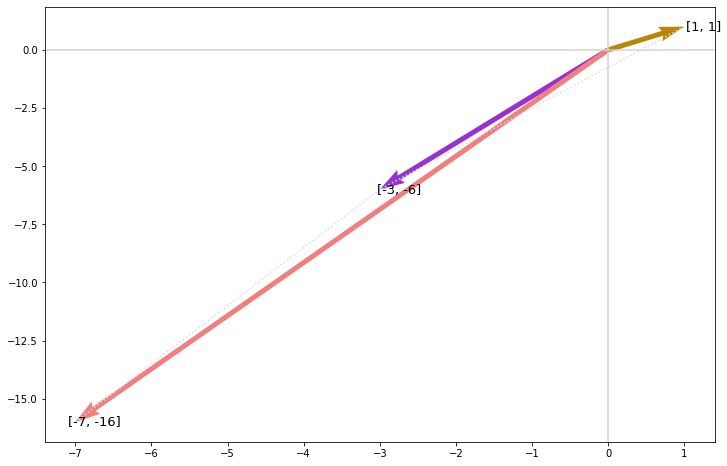

In [231]:
v2 = np.array([1, 1])
w2 = np.array([-3, -6])
vector_scaling2 = 2*v2 + 3*w2
vw_scaled2 = [v2, w2, vector_scaling2]

plot_vectors(vw_scaled2, plot_size=(12, 8))

See what vector scalar vector scaling does to the vector.

[-3, -9] [-6, -18]


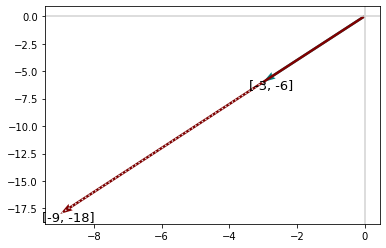

In [253]:
plot_vectors([w2, 3*w2])

## $Span$
The $span$ of $\overrightarrow v$ and $\overrightarrow w$ is the set of all their $linear$ $combinations$.

- $a$$\overrightarrow v$ + $b$$\overrightarrow w$
    - Let $a$ and $b$ vary over all real numbers.  

## $"$Linear Algebra... revolves around $scaling$ and $vector$ $multiplication"$
- The span of 2 vectors is basically asking what are all the possible vectors you can reach using only these two fundamental two operations?

### Exercise 2$\overrightarrow v$

[4, 8] [6, 12]


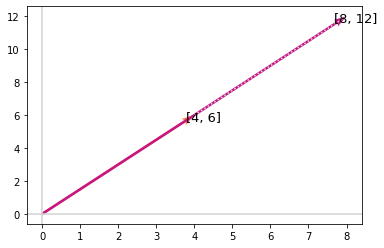

In [250]:
# Vector multiplication
v3 = np.array([4, 6])
v3_scaled = 2*v3

plot_vectors([v3, v3_scaled])

## $Vectors$ $vs.$ $Points$
- An easy way to wrap your head around vectors is to think of them as $points$. 

## Linear Combinations in 2D space

- What does $the$ $span$ $of$ $two$ $3D$ $vectors$ look like?
    - Two vectors in 3D space not pointing in the same direction
    - Their span is the collection of all possible linear comibinations.
        - All possible scaled values of the elements in each vector and adding the two together. 
        - This will form a plane of flat sheet in the 3D space.

## Linear Combinations in 3D space
- The idea of $"span"$ gets more interesting when we think of it as $3D$ $space$.

<br /> 

- $a$$\overrightarrow v$ + $b$$\overrightarrow w$ + $c$$\overrightarrow u$
    - the constants $a$, $b$, $c$ vary. 

<br /> 

- Now imagine that you can control the level of the flat sheet from the 2D space in the 3D space; you can physically touch every single point in the space with that sheet ("the third value in the vector will move around the sheet, sweeping across the 3D space.").




## Linear Dependency

- $a$$\overrightarrow v$ + $b$$\overrightarrow w$
    - if $\overrightarrow v$ and $\overrightarrow w$ line up, they are $linearly$ $dependent$. 
    - One of the vectors can be expressed as a linear combination of the other; because it is already in the span of the other. 


[5, 4.175] [6, 5.01]
[4.175, 9.175] [5.01, 11.01]


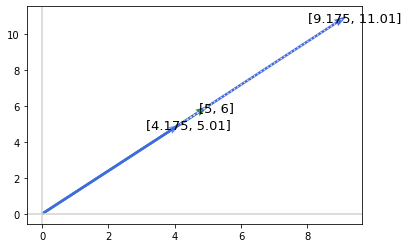

In [268]:
vec = np.array([5, 6])
vec_scaled = 0.835 * vec
linearly_dependent_vector = vec + vec_scaled 

plot_vectors([vec, vec_scaled, linearly_dependent_vector])

## Linear independence

- $\overrightarrow w$ $\neq$ $a$$\overrightarrow v$
    - If each vector add another dimension to the span, they are $linearly$ $independent$.

<br />
- Look! Below example adds another dimension to the span! :blush:

[-1, 2] [4, -2]


(-3.0, 5.0)

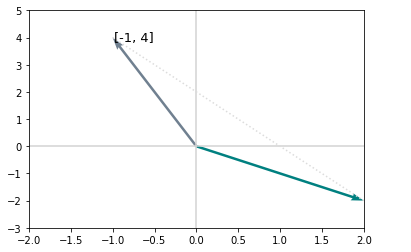

In [269]:
a = np.array([[-1, 4], [2, -2]])
plot_vectors(a)
plt.xlim(-2, 2)
plt.ylim(-3, 5)